In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1c3dfd5e-9585-4845-822c-45aff2aeaa72',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE: 
#If an error occurs, go to Anaconda Prompt and type in "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
#If it still does not work then, copy and paste the links shown in the prompt.

{'status': {'timestamp': '2023-03-14T14:56:37.612Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 9022}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10091, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [7]:
type(data)

dict

In [8]:
import pandas as pd

pd.set_option('display.max_columns', None) #allows to see all columns

In [9]:
df = pd.json_normalize(data['data']) #normalizes the data and makes a pretty dataframe

df['timestamp'] = pd.to_datetime('now')

df

C:\Users\ansar\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.931739e+07,1.931739e+07,NaN,1,NaN,NaN,None,2023-03-14T14:54:00.000Z,26102.688286,5.268568e+10,10.1198,0.866367,10.910788,16.909223,19.064137,37.354154,44.816844,5.042357e+11,44.4914,5.481565e+11,None,2023-03-14T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 14:56:49.666102
1,1027,Ethereum,ETH,ethereum,6576,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-03-14T14:54:00.000Z,1769.829566,1.541820e+10,-7.5691,1.692298,7.441015,13.178038,15.476731,25.360150,32.415658,2.165809e+11,19.1163,2.165809e+11,None,2023-03-14T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 14:56:49.666102
2,825,Tether,USDT,tether,49364,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.289955e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-03-14T14:54:00.000Z,1.004893,7.111062e+10,-3.7146,0.146720,-0.212391,0.488440,0.465747,0.475871,0.484933,7.325627e+10,6.4659,7.349967e+10,None,2023-03-14T14:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-14 14:56:49.666102
3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578923e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-03-14T14:54:00.000Z,318.422343,8.462578e+08,-21.8161,0.569312,3.067929,11.059749,2.767396,10.948228,17.001340,5.027643e+10,4.4311,5.094119e+10,None,2023-03-14T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 14:56:49.666102
4,3408,USD Coin,USDC,usd-coin,10697,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.950992e+10,3.950992e+10,NaN,5,NaN,NaN,None,2023-03-14T14:54:00.000Z,0.999613,7.461230e+09,-31.6303,0.185606,0.030670,-0.037019,-0.036605,-0.053698,-0.051084,3.949463e+10,3.4879,3.949463e+10,None,2023-03-14T14:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-14 14:56:49.666102
5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-03-14T14:54:00.000Z,0.385957,1.557457e+09,-10.1549,1.368558,3.285175,2.331689,0.838883,3.676800,-1.661991,1.966487e+10,1.7332,3.859572e+10,None,2023-03-14T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 14:56:49.666102
6,2010,Cardano,ADA,cardano,673,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.469833e+10,3.557370e+10,NaN,7,NaN,NaN,None,2023-03-14T14:54:00.000Z,0.367322,5.505920e+08,-17.6898,1.575661,5.653732,12.445296,-0.473156,11.982140,17.382371,1.274545e+10,1.1250,1.652948e+10,None,2023-03-14T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 14:56:49.666102
7,3890,Polygon,MATIC,polygon,610,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,None,2023-03-14T14:54:00.000Z,1.238361,1.021968e+09,6.3831,0.561907,5.567761,8.682819,-4.019841,36.937363,33.377430,1.081624e+10,0.9547,1.238361e+10,None,2023-03-14T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 14:56:49.666102
8,74,Dogecoin,DOGE,dogecoin,657,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,NaN,None,2023-03-14T14:54:

In [17]:
def api_crypto_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1c3dfd5e-9585-4845-822c-45aff2aeaa72',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #NOTE: 
    #If an error occurs, go to Anaconda Prompt and type in "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
    #If it still does not work then, copy and paste the links shown in the prompt.
    
    df = pd.json_normalize(data['data']) #normalizes the data and makes a pretty dataframe

    df['timestamp'] = pd.to_datetime('now')

    df
    
    if not os.path.isfile(r'C:\Users\ansar\Downloads\Data Analyst Bootcamp\Python\Projects\API.csv'):
        df.to_csv(r'C:\Users\ansar\Downloads\Data Analyst Bootcamp\Python\Projects\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\ansar\Downloads\Data Analyst Bootcamp\Python\Projects\API.csv', mode = 'a', header = False)

In [18]:
import os 

from time import time
from time import sleep

for i in range(333):
    api_crypto_runner()
    print("Automating API Pull Completed")
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2023-03-14T15:16:51.937Z', 'error_code': 0, 'error_message': None, 'elapsed': 9, 'credit_count': 1, 'notice': None, 'total_count': 9022}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10091, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ansar\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-14T15:17:52.850Z', 'error_code': 0, 'error_message': None, 'elapsed': 40, 'credit_count': 1, 'notice': None, 'total_count': 9022}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10091, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\ansar\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


KeyboardInterrupt: 

In [19]:
df2 = pd.read_csv(r'C:\Users\ansar\Downloads\Data Analyst Bootcamp\Python\Projects\API.csv')
df2 

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.931739e+07,1.931739e+07,NaN,1,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,25947.257061,5.119721e+10,2.5378,0.285653,6.991219,17.513264,18.406157,35.780338,43.822504,5.012332e+11,44.1281,5.448924e+11,NaN,2023-03-14T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 15:16:51.664024
1,1,1027,Ethereum,ETH,ethereum,6576,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,1775.239606,1.505192e+10,-13.4677,1.991401,5.170904,14.906173,15.834767,25.536479,32.528007,2.172429e+11,19.1348,2.172429e+11,NaN,2023-03-14T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 15:16:51.664024
2,2,825,Tether,USDT,tether,49364,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.289955e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,1.003273,6.943780e+10,-9.0611,0.056414,-0.188606,0.327224,0.307776,0.310802,0.320603,7.313815e+10,6.4420,7.338115e+10,NaN,2023-03-14T15:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-14 15:16:51.664024
3,3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578923e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,319.819157,8.203661e+08,-27.0104,1.080830,2.565650,12.181148,3.347476,11.117945,17.476966,5.049697e+10,4.4441,5.116466e+10,NaN,2023-03-14T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 15:16:51.664024
4,4,3408,USD Coin,USDC,usd-coin,10698,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.950992e+10,3.950992e+10,NaN,5,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,0.998586,7.345791e+09,-33.9579,0.037687,0.047375,-0.147334,-0.147174,-0.150729,-0.142731,3.945406e+10,3.4711,3.945406e+10,NaN,2023-03-14T15:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-14 15:16:51.664024
5,5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,0.387398,1.507535e+09,-15.9350,1.974270,2.505282,3.171325,1.310218,3.695746,-1.537772,1.973826e+10,1.7371,3.873977e+10,NaN,2023-03-14T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 15:16:51.664024
6,6,2010,Cardano,ADA,cardano,673,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.469833e+10,3.557370e+10,NaN,7,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,0.367991,5.342864e+08,-22.5024,1.247412,4.900342,13.774682,-0.261710,11.640396,17.429658,1.276867e+10,1.1247,1.655959e+10,NaN,2023-03-14T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 15:16:51.664024
7,7,3890,Polygon,MATIC,polygon,610,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,1.244926,9.867731e+08,-1.0581,1.842912,4.480165,11.084563,-2.880503,37.475498,33.656539,1.087358e+10,0.9577,1.244926e+10,NaN,2023-03-14T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 15:16:51.664024
8,8,74,Dogecoin,DOGE,dogecoin,657,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,NaN,NaN,2023

In [20]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [21]:
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19317387.00000,19317387.00000,NaN,1,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,25947.25706,51197205343.19218,2.53780,0.28565,6.99122,17.51326,18.40616,35.78034,43.82250,501233206236.26050,44.12810,544892398281.47998,NaN,2023-03-14T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 15:16:51.664024
1,1,1027,Ethereum,ETH,ethereum,6576,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,1775.23961,15051924584.86456,-13.46770,1.99140,5.17090,14.90617,15.83477,25.53648,32.52801,217242934029.97720,19.13480,217242934029.98001,NaN,2023-03-14T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 15:16:51.664024
2,2,825,Tether,USDT,tether,49364,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,72899554644.60480,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,1.00327,69437803075.45566,-9.06110,0.05641,-0.18861,0.32722,0.30778,0.31080,0.32060,73138147658.94118,6.44200,73381152070.37000,NaN,2023-03-14T15:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-14 15:16:51.664024
3,3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157892269.54187,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,319.81916,820366095.32135,-27.01040,1.08083,2.56565,12.18115,3.34748,11.11794,17.47697,50496972587.06248,4.44410,51164657138.35000,NaN,2023-03-14T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 15:16:51.664024
4,4,3408,USD Coin,USDC,usd-coin,10698,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,39509917694.04090,39509917694.04090,NaN,5,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,0.99859,7345791130.33791,-33.95790,0.03769,0.04738,-0.14733,-0.14717,-0.15073,-0.14273,39454058331.71115,3.47110,39454058331.71000,NaN,2023-03-14T15:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-14 15:16:51.664024
5,5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,0.38740,1507534784.58530,-15.93500,1.97427,2.50528,3.17133,1.31022,3.69575,-1.53777,19738263947.63485,1.73710,38739765011.46000,NaN,2023-03-14T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 15:16:51.664024
6,6,2010,Cardano,ADA,cardano,673,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34698327086.01700,35573698990.42300,NaN,7,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,0.36799,534286384.01193,-22.50240,1.24741,4.90034,13.77468,-0.26171,11.64040,17.42966,12768668991.05014,1.12470,16559590990.45000,NaN,2023-03-14T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 15:16:51.664024
7,7,3890,Polygon,MATIC,polygon,610,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,NaN,2023-03-14T15:14:00.000Z,1.24493,986773085.35731,-1.05810,1.84291,4.48016,11.08456,-2.88050,37.47550,33.65654,10873579382.82248,0.95770,12449260533.05000,NaN,2023-03-14T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-14 15:16:51.664

In [23]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.28892,7.21343,17.73851,18.47457,35.92872,44.11775
Ethereum,2.09704,5.41705,15.24433,15.99745,25.82398,32.91706
Tether,0.01967,-0.14564,0.31024,0.28844,0.29739,0.30421
BNB,0.90339,2.71598,12.26978,3.19732,11.08693,17.57905
USD Coin,0.05532,0.12850,-0.10950,-0.15714,-0.14773,-0.14326
XRP,1.75446,2.54065,2.08366,1.13147,3.57166,-1.59486
Cardano,0.98746,5.06574,13.64030,-0.55633,11.39098,17.38074
Polygon,1.47444,4.43847,10.95676,-3.16559,37.18335,33.57991
Dogecoin,0.87749,6.16473,5.87135,-8.00589,-3.21573,-15.35063


In [24]:
df4 = df3.stack() #dataframe is converted into series
df4

name                                  
Bitcoin   quote.USD.percent_change_1h     0.28892
          quote.USD.percent_change_24h    7.21343
          quote.USD.percent_change_7d    17.73851
          quote.USD.percent_change_30d   18.47457
          quote.USD.percent_change_60d   35.92872
                                           ...   
Litecoin  quote.USD.percent_change_24h    8.25933
          quote.USD.percent_change_7d     3.62942
          quote.USD.percent_change_30d   -5.84137
          quote.USD.percent_change_60d    4.29900
          quote.USD.percent_change_90d   11.78206
Length: 90, dtype: float64

In [27]:
df5 = df4.to_frame(name = 'values')
df5
df5.count()

values    90
dtype: int64

In [30]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.28892
1,Bitcoin,quote.USD.percent_change_24h,7.21343
2,Bitcoin,quote.USD.percent_change_7d,17.73851
3,Bitcoin,quote.USD.percent_change_30d,18.47457
4,Bitcoin,quote.USD.percent_change_60d,35.92872
...,...,...,...
85,Litecoin,quote.USD.percent_change_24h,8.25933
86,Litecoin,quote.USD.percent_change_7d,3.62942
87,Litecoin,quote.USD.percent_change_30d,-5.84137
88,Litecoin,quote.USD.percent_change_60d,4.29900


In [31]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.28892
1,Bitcoin,quote.USD.percent_change_24h,7.21343
2,Bitcoin,quote.USD.percent_change_7d,17.73851
3,Bitcoin,quote.USD.percent_change_30d,18.47457
4,Bitcoin,quote.USD.percent_change_60d,35.92872
...,...,...,...
85,Litecoin,quote.USD.percent_change_24h,8.25933
86,Litecoin,quote.USD.percent_change_7d,3.62942
87,Litecoin,quote.USD.percent_change_30d,-5.84137
88,Litecoin,quote.USD.percent_change_60d,4.29900


In [36]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'], ['1h'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h'], ['24h'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_7d'], ['7d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_30d'], ['30d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_60d'], ['60d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_90d'], ['90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.28892
1,Bitcoin,24h,7.21343
2,Bitcoin,7d,17.73851
3,Bitcoin,30d,18.47457
4,Bitcoin,60d,35.92872
...,...,...,...
85,Litecoin,24h,8.25933
86,Litecoin,7d,3.62942
87,Litecoin,30d,-5.84137
88,Litecoin,60d,4.29900


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

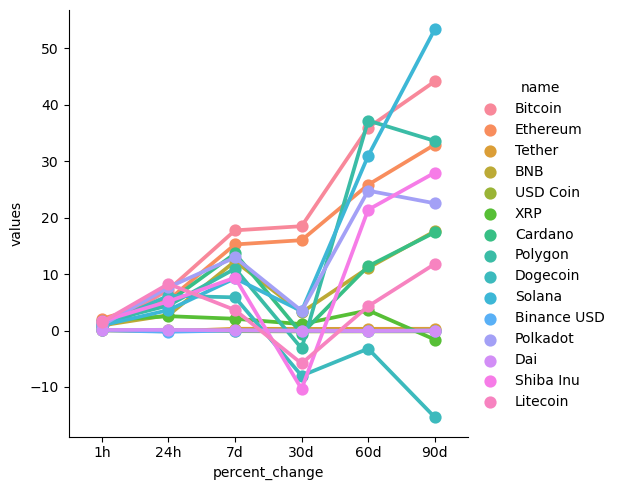

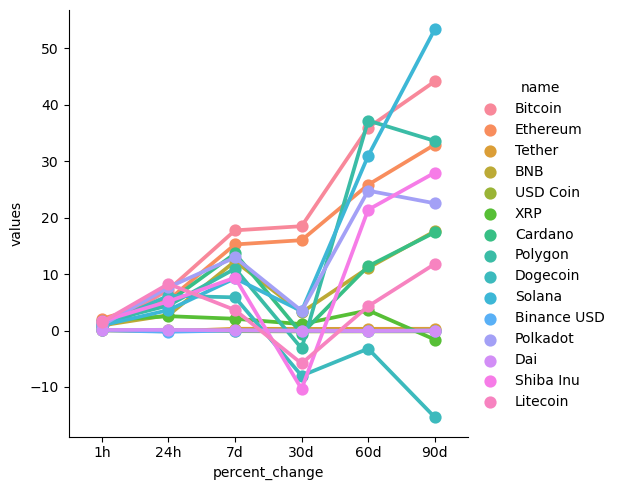

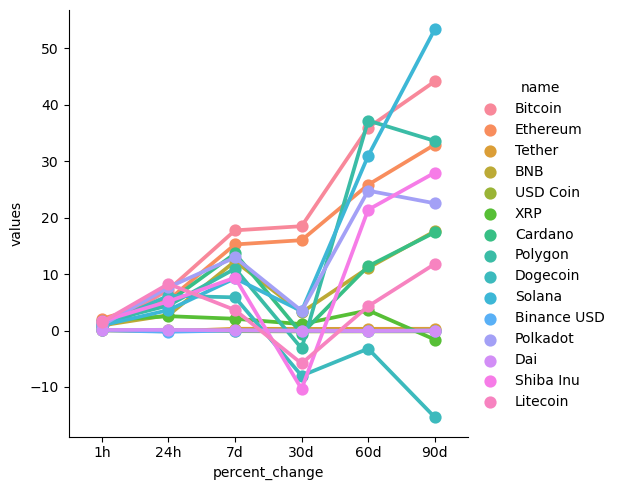

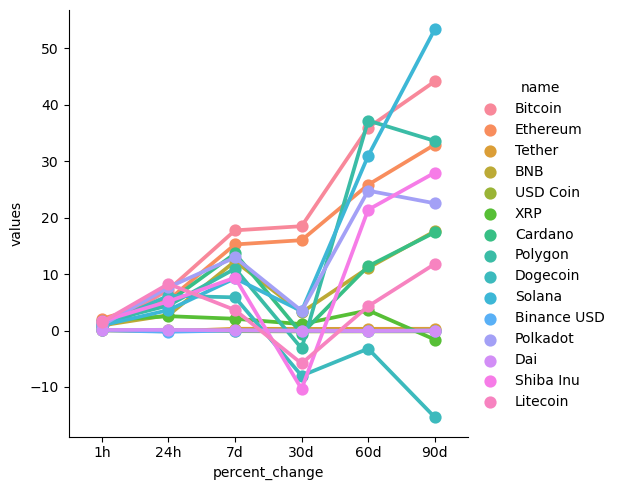

In [41]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')
plt.show()

In [55]:
df8 = df2[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Dai'")
df8

,name,quote.USD.price,timestamp
13,Dai,0.99922,2023-03-14 15:16:51.664024
27,Dai,0.99945,2023-03-14 15:17:52.567975


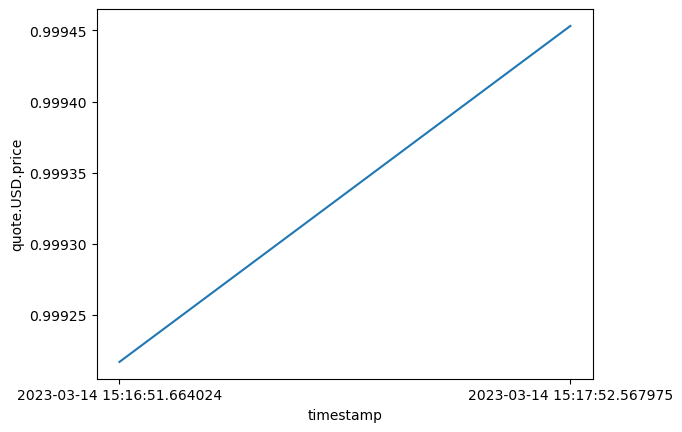

In [56]:
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)
plt.show()